In [1]:
# Import required libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3

In [2]:
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

## Generate Data

In [23]:
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

<Axes: xlabel='x', ylabel='y'>

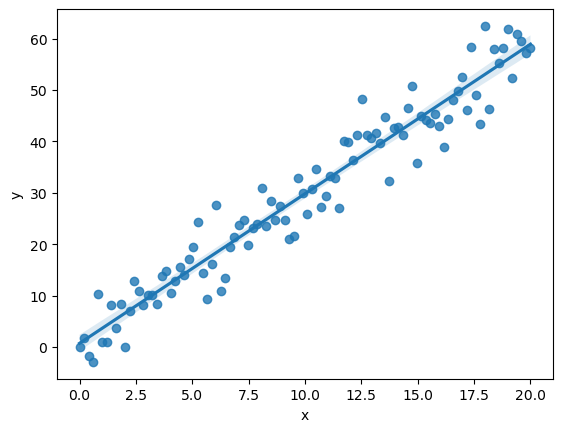

In [24]:
# plot
sns.regplot(x='x',y='y', data=df)

## Modeling OLS 

In [25]:
# split features and target
X = df[['constant', 'x']]
        
# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1516.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.99e-61
Time:                        19:10:08   Log-Likelihood:                -288.05
No. Observations:                 100   AIC:                             580.1
Df Residuals:                      98   BIC:                             585.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.7411      0.865      0.857      0.394      -0.975       2.457
x              2.9088      0.075     38.939      0.000       2.761       3.057
==============================================================================
Omnibus:                        0.008   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.109
Skew:                          -0.017   Prob(JB):                        0.947
Kurtosis:                       2.842   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""